In [ ]:
#hide
#all_slow

In [ ]:
#hide
#default_exp motif
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

# motif

>Processing and analyzing glycan sequences on a motif-basis

In [ ]:
#export
from glycowork.motif.analysis import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
from glycowork.motif.processing import *
from glycowork.motif.query import *
from glycowork.motif.tokenization import *
from glycowork.glycan_data.loader import df_species

`motif` contains many functions to process glycans in various ways and use this processing to analyze glycans via curated motifs, graph features, and sequence features. It contains the following modules:

- `analysis` contains functions for downstream analyses of important glycan motifs etc.
- `annotate` contains functions to extract curated motifs, graph features, and sequence features from glycan sequences
- `graph` is used to convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.
- `processing` contains all the basic functions to process IUPACcondensed glycan sequences into glycoletters etc. Also contains `get_lib` to construct the glycoletter library
- `query` is used to interact with the databases contained in glycowork, delivering insights for sequences of interest
- `tokenization` has helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

## analysis
 >downstream analyses of important glycan motifs

In [ ]:
show_doc(get_pvals_motifs)

<h4 id="get_pvals_motifs" class="doc_header"><code>get_pvals_motifs</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L32" class="source_link" style="float:right">[source]</a></h4>

> <code>get_pvals_motifs</code>(**`df`**, **`glycan_col_name`**=*`'glycan'`*, **`label_col_name`**=*`'target'`*, **`libr`**=*`None`*, **`thresh`**=*`1.645`*, **`sorting`**=*`True`*, **`feature_set`**=*`['exhaustive']`*, **`extra`**=*`'termini'`*, **`wildcard_list`**=*`[]`*, **`multiple_samples`**=*`False`*, **`motifs`**=*`None`*, **`estimate_speedup`**=*`False`*)

returns enriched motifs based on label data or predicted data

| Arguments:
| :-
| df (dataframe): dataframe containing glycan sequences and labels
| glycan_col_name (string): column name for glycan sequences; arbitrary if multiple_samples = True; default:'glycan'
| label_col_name (string): column name for labels; arbitrary if multiple_samples = True; default:'target'
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| thresh (float): threshold value to separate positive/negative; default is 1.645 for Z-scores
| sorting (bool): whether p-value dataframe should be sorted ascendingly; default: True
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'exhaustive'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans) and 'exhaustive' (all mono- and disaccharide features)
| extra (string): 'ignore' skips this, 'wildcards' allows for wildcard matching', and 'termini' allows for positional matching; default:'termini'
| wildcard_list (list): list of wildcard names (such as '?1-?', 'Hex', 'HexNAc', 'Sia')
| multiple_samples (bool): set to True if you have multiple samples (rows) with glycan information (columns); default:False
| motifs (dataframe): can be used to pass a modified motif_list to the function; default:None
| estimate_speedup (bool): if True, pre-selects motifs for those which are present in glycans, not 100% exact; default:False

| Returns:
| :-
| Returns dataframe with p-values and corrected p-values for every glycan motif

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
out = get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:]

Glyco-Motif enrichment p-value test


In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

,motif,pval,corr_pval
4,GlcNAc,0.013469,0.394527
19,b1-4,0.013469,0.394527
8,Man,0.025198,0.590671
11,a1-3,0.025636,0.590671
13,a1-6,0.091752,0.958241
26,GlcNAc(b1-4)GlcNAc,0.091752,0.958241
33,Man(a1-3)Man,0.091752,0.958241
34,Man(a1-6)Man,0.091752,0.958241
35,Man(b1-4)GlcNAc,0.091752,0.958241
10,a1-2,0.130826,0.980276


In [ ]:
show_doc(get_representative_substructures)

<h4 id="get_representative_substructures" class="doc_header"><code>get_representative_substructures</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L101" class="source_link" style="float:right">[source]</a></h4>

> <code>get_representative_substructures</code>(**`enrichment_df`**, **`libr`**=*`None`*)

builds minimal glycans that contain enriched motifs from get_pvals_motifs

| Arguments:
| :-
| enrichment_df (dataframe): output from get_pvals_motifs
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset

| Returns:
| :-
| Returns up to 10 minimal glycans in a list

In [ ]:
show_doc(make_heatmap)

<h4 id="make_heatmap" class="doc_header"><code>make_heatmap</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L148" class="source_link" style="float:right">[source]</a></h4>

> <code>make_heatmap</code>(**`df`**, **`mode`**=*`'sequence'`*, **`libr`**=*`None`*, **`feature_set`**=*`['known']`*, **`extra`**=*`'termini'`*, **`wildcard_list`**=*`[]`*, **`datatype`**=*`'response'`*, **`rarity_filter`**=*`0.05`*, **`filepath`**=*`''`*, **`index_col`**=*`'target'`*, **`estimate_speedup`**=*`False`*, **\*\*`kwargs`**)

clusters samples based on glycan data (for instance glycan binding etc.)

| Arguments:
| :-
| df (dataframe): dataframe with glycan data, rows are samples and columns are glycans
| mode (string): whether glycan 'sequence' or 'motif' should be used for clustering; default:sequence
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| feature_set (list): which feature set to use for annotations, add more to list to expand; default is 'exhaustive'; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans) and 'exhaustive' (all mono- and disaccharide features)
| extra (string): 'ignore' skips this, 'wildcards' allows for wildcard matching', and 'termini' allows for positional matching; default:'termini'
| wildcard_list (list): list of wildcard names (such as 'bond', 'Hex', 'HexNAc', 'Sia')
| datatype (string): whether df comes from a dataset with quantitative variable ('response') or from presence_to_matrix ('presence')
| rarity_filter (float): proportion of samples that need to have a non-zero value for a variable to be included; default:0.05
| filepath (string): absolute path including full filename allows for saving the plot
| index_col (string): default column to convert to dataframe index; default:'target'
| estimate_speedup (bool): if True, pre-selects motifs for those which are present in glycans, not 100% exact; default:False
| **kwargs: keyword arguments that are directly passed on to seaborn clustermap
                      
| Returns:
| :-
| Prints clustermap                         

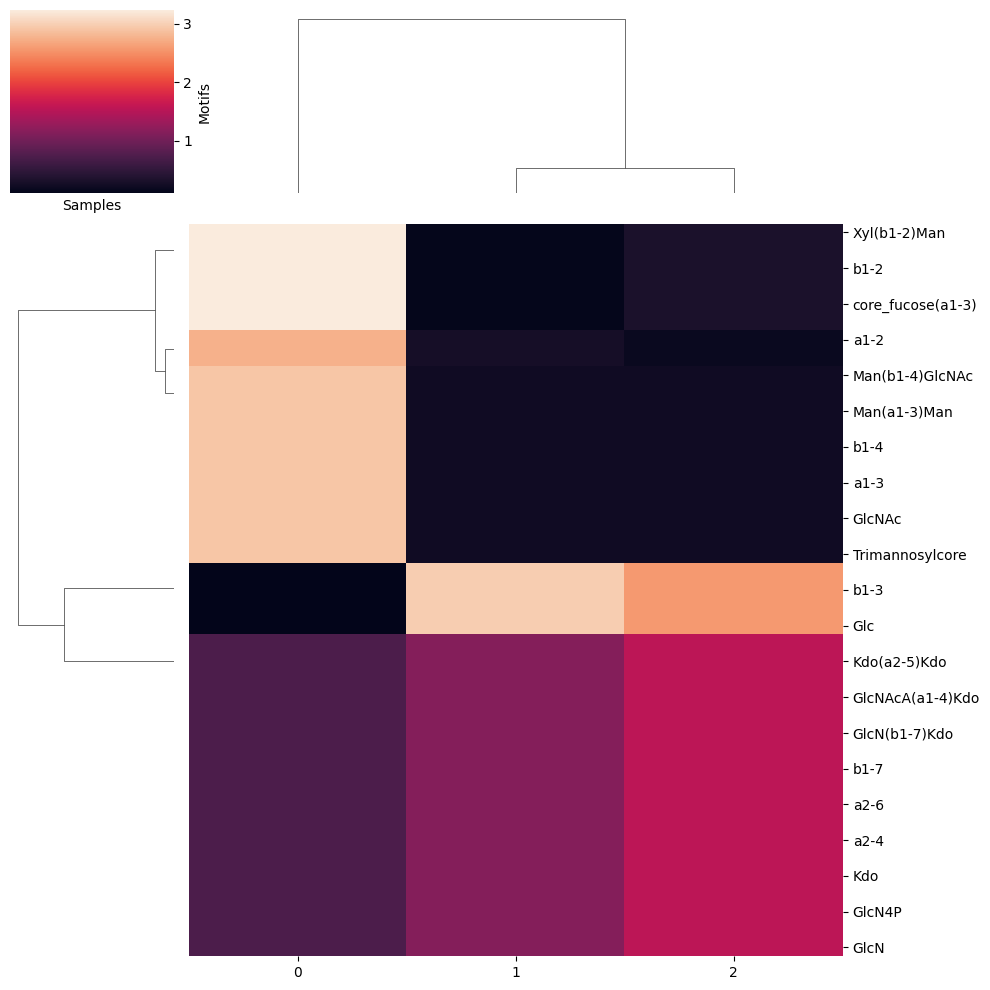

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [0.134, 0.345, 1.15, 0.233, 2.981]
label3 = [0.334, 0.245, 1.55, 0.133, 2.581]
test_df = pd.DataFrame([label, label2, label3], columns = glycans)

make_heatmap(test_df, mode = 'motif', feature_set = ['known', 'exhaustive'])

In [ ]:
show_doc(plot_embeddings)

<h4 id="plot_embeddings" class="doc_header"><code>plot_embeddings</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/motif/analysis.py#L213" class="source_link" style="float:right">[source]</a></h4>

> <code>plot_embeddings</code>(**`glycans`**, **`emb`**=*`None`*, **`label_list`**=*`None`*, **`shape_feature`**=*`None`*, **`filepath`**=*`''`*, **`alpha`**=*`0.8`*, **`palette`**=*`'colorblind'`*, **\*\*`kwargs`**)

plots glycan representations for a list of glycans

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| emb (dictionary): stored glycan representations; default takes them from trained species-level SweetNet model
| label_list (list): list of same length as glycans if coloring of the plot is desired
| shape_feature (string): monosaccharide/bond used to display alternative shapes for dots on the plot
| filepath (string): absolute path including full filename allows for saving the plot
| alpha (float): transparency of points in plot; default:0.8
| palette (string): color palette to color different classes; default:'colorblind'
| **kwargs: keyword arguments that are directly passed on to matplotlib

In [ ]:
df_fabales = df_species[df_species.Order == 'Fabales'].reset_index(drop = True)
plot_embeddings(df_fabales.target.values.tolist(), label_list = df_fabales.Family.values.tolist())

KeyError: 'Gal(?1-?)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Man(a1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc'

In [ ]:
show_doc(characterize_monosaccharide)

In [ ]:
characterize_monosaccharide('D-Rha', rank = 'Kingdom', focus = 'Bacteria', modifications = True)

## annotate
>extract curated motifs, graph features, and sequence features from glycan sequences

In [ ]:
show_doc(motif_matrix)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
label = [1,1,0]
test_df = pd.DataFrame({'glycan':glycans, 'eukaryotic':label})
print("Glyco-Motif Test")
out = motif_matrix(test_df, 'glycan', 'eukaryotic')

In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

In [ ]:
show_doc(annotate_glycan)

In [ ]:
show_doc(annotate_dataset)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
print("Annotate Test")
out = annotate_dataset(glycans)

In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

In [ ]:
show_doc(get_k_saccharides)

In [ ]:
get_k_saccharides('GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
                 k = 3)

## graph
>convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.

In [ ]:
show_doc(glycan_to_nxGraph)

In [ ]:
print('Glycan to networkx Graph (only edges printed)')
print(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').edges())

In [ ]:
show_doc(graph_to_string)

In [ ]:
graph_to_string(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

In [ ]:
show_doc(compare_glycans)

In [ ]:
print("Graph Isomorphism Test")
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                      'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

In [ ]:
show_doc(subgraph_isomorphism)

In [ ]:
print("Subgraph Isomorphism Test")
print(subgraph_isomorphism('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                           'Fuc(a1-6)GlcNAc'))

In [ ]:
show_doc(generate_graph_features)

In [ ]:
show_doc(largest_subgraph)

In [ ]:
glycan1 = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
glycan2 = 'Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
largest_subgraph(glycan1, glycan2)

## processing
>process IUPAC-condensed glycan sequences into glycoletters etc.

In [ ]:
show_doc(min_process_glycans)

In [ ]:
min_process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

In [ ]:
show_doc(get_lib)

In [ ]:
get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

In [ ]:
show_doc(expand_lib)

In [ ]:
lib1 = get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])
lib2 = expand_lib(lib1, ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'])
lib2

In [ ]:
show_doc(presence_to_matrix)

In [ ]:
out = presence_to_matrix(df_species[df_species.Order == 'Fabales'].reset_index(drop = True),
                         label_col_name = 'Family')

In [ ]:
#hide_input
HTML(out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'}).render())

In [ ]:
show_doc(choose_correct_isoform)

## query
>for interacting with the databases contained in glycowork, delivering insights for sequences of interest

In [ ]:
show_doc(get_insight)

In [ ]:
print("Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'")
get_insight('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

In [ ]:
show_doc(glytoucan_to_glycan)

In [ ]:
glytoucan_to_glycan(['G59003TN', 'G88185OE'])

## tokenization
>helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

In [ ]:
show_doc(string_to_labels)

In [ ]:
string_to_labels(['Man','a1-3','Man','a1-6','Man'])

In [ ]:
show_doc(pad_sequence)

In [ ]:
pad_sequence(string_to_labels(['Man','a1-3','Man','a1-6','Man']), 7)

In [ ]:
show_doc(stemify_glycan)

In [ ]:
show_doc(stemify_dataset)

In [ ]:
show_doc(mask_rare_glycoletters)

In [ ]:
show_doc(match_composition_relaxed)

In [ ]:
match_composition_relaxed({"Hex":3, "HexNAc":2, "dHex":1}, "Homo_sapiens", "Species")

In [ ]:
show_doc(condense_composition_matching)

In [ ]:
match_comp = match_composition_relaxed({'Hex':1, 'HexNAc':1, 'Neu5Ac':1},
                                       'Homo_sapiens', 'Species', reducing_end = 'GalNAc')
print(match_comp)
condense_composition_matching(match_comp)

In [ ]:
show_doc(mz_to_structures)

In [ ]:
show_doc(compositions_to_structures)

In [ ]:
show_doc(structures_to_motifs)

In [ ]:
show_doc(canonicalize_iupac)

In [ ]:
show_doc(structure_to_basic)

In [ ]:
show_doc(glycan_to_composition)

In [ ]:
show_doc(calculate_theoretical_mass)

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()